In [38]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.datasets as datasets
import sklearn.model_selection as skms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as skpre
from sklearn import linear_model

!pip install scikit-learn

In [39]:
iris = datasets.load_iris()
diabetes = datasets.load_diabetes()
digits = datasets.load_digits()

In [40]:
def add_three(x, y=0):
    return x + 3

def add(x, y):
    return x + y

result1 = add_three(10)    
result2 = add_three(10, 3) 

print(result1 == result2)

True


In [41]:
def make_adder(k):
    def add_k(x):
        return x + k
    return add_k

three_adder = make_adder(3) 
three_adder(10) == add_three(10)

True

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
print(" ".join(knn.get_params().keys()))

algorithm leaf_size metric metric_params n_jobs n_neighbors p weights


In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits

param_grid = {"n_neighbors": [1, 3, 5, 10, 20]}

knn = KNeighborsClassifier()

grid_model = GridSearchCV(knn,
                          return_train_score=True,
                          param_grid=param_grid,
                          cv=10)
grid_model.fit(digits.data, digits.target)

/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 10, 20]},
             return_train_score=True)

In [44]:
param_cols = ['param_n_neighbors']
score_cols = ['mean_train_score', 'std_train_score',
              'mean_test_score', 'std_test_score']

df = pd.DataFrame(grid_model.cv_results_).head()

display(df[param_cols + score_cols])

,param_n_neighbors,mean_train_score,std_train_score,mean_test_score,std_test_score
0,1,1.000000,0.000000,0.974963,0.017080
1,3,0.993322,0.000772,0.976633,0.015473
2,5,0.990540,0.000621,0.971074,0.017169
3,10,0.985841,0.001251,0.962163,0.020458
4,20,0.980709,0.001743,0.958824,0.022388


In [45]:
grid_df = pd.DataFrame(grid_model.cv_results_, 
                       columns=['param_n_neighbors',
                                'mean_train_score',
                                'mean_test_score'])
grid_df.set_index('param_n_neighbors', inplace=True)
display(grid_df)

/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,mean_train_score,mean_test_score
param_n_neighbors,,
1,1.000000,0.974963
3,0.993322,0.976633
5,0.990540,0.971074
10,0.985841,0.962163
20,0.980709,0.958824


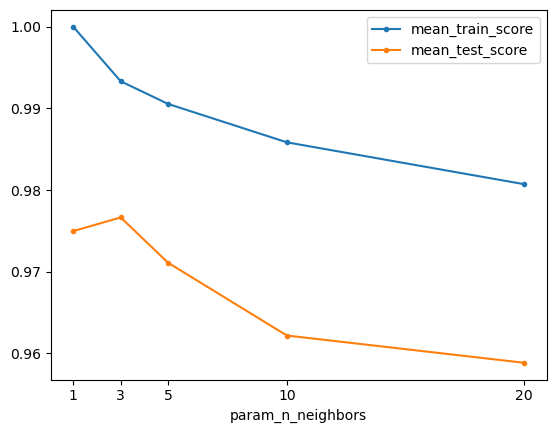

In [46]:
ax = grid_df.plot.line(marker='.')
ax.set_xticks(grid_df.index);

In [47]:
def best_model_hyper_params(make_a_model,
                            some_hyper_params,
                            data):
    results = {}
    for hyper_params in it.combinations(some_hyper_params):
        for train, test in make_cv_split(data):
            model = make_a_model(*hyper_params).fit(train)
    
    best_hp = max(results, key=results.get)
    best_model = make_a_model(*best_hp).fit(data)
    return best_model

def do_it():
    model = pick_a_model

    some_hyper_params = [values_for_hyper_param_1,
                         values_for_hyper_param_2,
                         values_for_hyper_param_3]

    best_model_hyper_params(model_type, 
                            some_hyper_params, 
                            data)

In [48]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors": np.arange(1, 11),
              "weights": ['uniform', 'distance'],
              "p": [1, 2, 4, 8, 16]}

knn = KNeighborsClassifier()
grid_model = GridSearchCV(knn, param_grid=param_grid, cv=10)

In [49]:
%timeit -r1 grid_model.fit(iris.data, iris.target)

/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

1.52 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

In [50]:
param_df = pd.DataFrame.from_records(grid_model.cv_results_['params'])
param_df['mean_test_score'] = grid_model.cv_results_['mean_test_score']
param_df.sort_values(by=['mean_test_score']).tail()

,n_neighbors,p,weights,mean_test_score
75,8,4,distance,0.98
74,8,4,uniform,0.98
98,10,16,uniform,0.98
88,9,16,uniform,0.98
99,10,16,distance,0.98


In [51]:
print("Best Estimator:", grid_model.best_estimator_,
      "Best Score:",     grid_model.best_score_,
      "Best Params:",    grid_model.best_params_, sep="\n")

Best Estimator:
KNeighborsClassifier(n_neighbors=8, p=4)
Best Score:
0.9800000000000001
Best Params:
{'n_neighbors': 8, 'p': 4, 'weights': 'uniform'}


In [52]:
!pip install scikit-learn numpy

In [53]:
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris

knn = KNeighborsClassifier()
param_dists = {"n_neighbors": ss.randint(1, 11),
               "weights": ['uniform', 'distance'],
               "p": ss.geom(p=0.5)}

mod = RandomizedSearchCV(knn,
                         param_distributions=param_dists,
                         cv=10,
                         n_iter=20)

# Load the iris dataset
iris = load_iris()

# fitting 20 models
%timeit -r1 mod.fit(iris.data, iris.target)
print(mod.best_score_)

/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

304 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
0.9800000000000001


/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

In [54]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors": np.arange(1, 11),
              "weights": ['uniform', 'distance'],
              "p": [1, 2, 4, 8, 16]}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn,
                        param_grid=param_grid,
                        cv=3)

In [55]:
outer_scores = skms.cross_val_score(grid_knn, 
                                    iris.data, iris.target,
                                    cv=5)
print(outer_scores)

/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

[0.96666667 1.         0.93333333 0.96666667 1.        ]


In [56]:
def nested_cv_pseudo_code(all_data, modelClass):
    results = []
    for outer_train, test in make_cv_split(all_data):

        for hyper_params in hyper_paramater_possibilities:
            model = modelClass(hyper_params)
            for train, valid in make_cv_split(outer_train):
                inner_score = evaluate(model.fit(train).predict(valid))
             
        preds = best_model.fit(outer_train).predict(test)
        results.append(evaluate(preds))

In [58]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.datasets import load_iris

param_grid = {"n_neighbors": np.arange(1, 11),
              "weights": ['uniform', 'distance'],
              "p": [1, 2, 4, 8, 16]}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid, cv=2)
iris = load_iris()

outer_scores = cross_val_score(grid_knn,
                               iris.data, 
                               iris.target,
                               cv=5)
print(outer_scores)

/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]


/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

In [59]:
grid_knn.fit(iris.data, iris.target)
preferred_params = grid_knn.best_estimator_.get_params()

final_knn = neighbors.KNeighborsClassifier(**preferred_params)
final_knn.fit(iris.data, iris.target)

/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

NameError: name 'neighbors' is not defined

In [61]:
import numpy as np
import sklearn.preprocessing as skpre
import sklearn.linear_model as linear_model
import sklearn.pipeline as pipeline
import sklearn.model_selection as skms
from sklearn.datasets import load_iris

scaler = skpre.StandardScaler()
logreg = linear_model.LogisticRegression()

pipe = pipeline.make_pipeline(scaler, logreg)
iris = load_iris()

print(skms.cross_val_score(pipe, iris.data, iris.target, cv=10))

[1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.8        1.         1.         1.        ]


In [62]:
def extract_name(obj):
    return str(logreg.__class__).split('.')[-1][:2].lower()

print(logreg.__class__)
print(extract_name(logreg))

<class 'sklearn.linear_model._logistic.LogisticRegression'>
lo


In [63]:
pipe.named_steps.keys()

dict_keys(['standardscaler', 'logisticregression'])

In [64]:
pipe = pipeline.Pipeline(steps=[('scaler', scaler),
                                ('knn', knn)])

cv_scores = skms.cross_val_score(pipe, iris.data, iris.target, 
                                 cv=10, 
                                 n_jobs=-1) # all CPUs
print(pipe.named_steps.keys())
print(cv_scores)

dict_keys(['scaler', 'knn'])
[1.         0.93333333 1.         0.93333333 0.86666667 0.93333333
 0.86666667 1.         1.         1.        ]


/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

In [65]:
from sklearn.base import TransformerMixin
class Median_Big_Small(TransformerMixin):
    def fit(self, ftrs, tgt=None):
        self.medians = np.median(ftrs)
        return self
    def transform(self, ftrs, tgt=None):
        return ftrs > self.medians

In [67]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import pipeline
from sklearn import preprocessing as skpre
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

# Load the Iris dataset
iris = datasets.load_iris()

# Create the pipeline
scaler = skpre.StandardScaler()
quad_inters = skpre.PolynomialFeatures(degree=2,              
                                       interaction_only=True, 
                                       include_bias=False)
median_big_small = Median_Big_Small()
knn = neighbors.KNeighborsClassifier()

pipe = pipeline.Pipeline(steps=[('scaler', scaler),
                                ('inter',  quad_inters),
                                ('mbs',    median_big_small),
                                ('knn',    knn)])

# Perform cross-validation
cv_scores = cross_val_score(pipe, iris.data, iris.target, cv=10)

print(cv_scores)

[0.6        0.66666667 0.8        0.73333333 0.8        0.66666667
 0.66666667 0.66666667 0.86666667 0.8       ]


/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

In [68]:
scaler = skpre.StandardScaler()
poly   = skpre.PolynomialFeatures()
lasso  = linear_model.Lasso(selection='random', tol=.01)
pipe = pipeline.make_pipeline(scaler, 
                              poly, 
                              lasso)

In [69]:
param_grid = {"polynomialfeatures__degree" : np.arange(2,6),
              "lasso__alpha" : np.logspace(1,6,6,base=2)}

from pprint import pprint as pp
pp(param_grid)

{'lasso__alpha': array([ 2.,  4.,  8., 16., 32., 64.]),
 'polynomialfeatures__degree': array([2, 3, 4, 5])}


In [70]:
mod = skms.GridSearchCV(pipe, param_grid, n_jobs=-1)
mod.fit(diabetes.data, diabetes.target);

/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.873e+04, tolerance: 2.153e+04
  model = cd_fast.enet_coordinate_descent(


In [72]:
import textwrap
for name, step in mod.best_estimator_.named_steps.items():
    print("Step:", name)
    print(textwrap.indent(textwrap.fill(str(step), 50), " " * 6))

Step: standardscaler
      StandardScaler()
Step: polynomialfeatures
      PolynomialFeatures()
Step: lasso
      Lasso(alpha=4.0, selection='random', tol=0.01)


In [ ]:
pp(mod.best_params_)